In [2]:
import math
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
%matplotlib inline

# 1.1

First I grab the raw data:

In [3]:
raw_data = pd.read_csv('movie_ratings.csv', index_col=0)
raw_data

,4d22b,e36d7,c5f52,900a3,bac6f,7ac23,a0315,461ff,c52e2,0c20d,74541,c2afd,ff965,186bc
Inception,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,NaN,5.0
Zero Dark Thirty,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21 Jump Street,5.0,5.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN
The Lego Movie,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,3.0,5.0,3.0,NaN,NaN,NaN
The Avengers,3.0,NaN,5.0,4.0,NaN,3.0,4.0,5.0,5.0,5.0,4.0,4.0,NaN,5.0
Interstellar,NaN,5.0,3.0,4.0,NaN,3.0,4.0,5.0,5.0,NaN,2.0,NaN,NaN,NaN
Gravity,NaN,4.0,4.0,3.0,NaN,4.0,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN
Zootopia,NaN,NaN,5.0,NaN,NaN,NaN,4.0,5.0,NaN,5.0,5.0,NaN,NaN,NaN
Inside Out,NaN,5.0,5.0,4.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,5.0,NaN,3.0
Life of Pi,NaN,3.0,NaN,NaN,5.0,NaN,NaN,4.0,5.0,4.0,1.0,NaN,5.0,4.0


Then I filter out all movies with less than three ratings:

In [4]:
data_v2 = raw_data[raw_data.shape[1]-raw_data.T.isnull().sum()>3]

In [5]:
data_v2

,4d22b,e36d7,c5f52,900a3,bac6f,7ac23,a0315,461ff,c52e2,0c20d,74541,c2afd,ff965,186bc
Inception,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,NaN,5.0
21 Jump Street,5.0,5.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN
The Lego Movie,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,3.0,5.0,3.0,NaN,NaN,NaN
The Avengers,3.0,NaN,5.0,4.0,NaN,3.0,4.0,5.0,5.0,5.0,4.0,4.0,NaN,5.0
Interstellar,NaN,5.0,3.0,4.0,NaN,3.0,4.0,5.0,5.0,NaN,2.0,NaN,NaN,NaN
Gravity,NaN,4.0,4.0,3.0,NaN,4.0,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN
Zootopia,NaN,NaN,5.0,NaN,NaN,NaN,4.0,5.0,NaN,5.0,5.0,NaN,NaN,NaN
Inside Out,NaN,5.0,5.0,4.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,5.0,NaN,3.0
Life of Pi,NaN,3.0,NaN,NaN,5.0,NaN,NaN,4.0,5.0,4.0,1.0,NaN,5.0,4.0
Wall-E,5.0,4.0,4.0,4.0,5.0,5.0,4.0,NaN,5.0,4.0,4.0,4.0,NaN,NaN


Then I filter out users that rated less than 50% of the movies. I repeat these two steps to make sure my final data fulfills both characteristics.

In [6]:
data = data_v2.T[(data_v2.shape[0]-data_v2.isnull().sum())/data_v2.shape[0]>.5].T
data = data[data.shape[1]-data.T.isnull().sum()>3]
data = data.T[(data.shape[0]-data.isnull().sum())/data.shape[0]>.5].T
data = data[data.shape[1]-data.T.isnull().sum()>3]
data = data.fillna(3)-3
DEFAULT_DATA = data.copy()

I created a utility function, default(), in case I end up changing my data at some point and want to restore it to the filtered state. As it turns out, I don't (all the functions I use are non destructive), so I don't actually use it, but it was important in case I decided to make destructive functions.

And what follows is my filtered data: 14 movies, 9 users.

In [7]:
def default():
    data = DEFAULT_DATA
default()
data

,e36d7,c5f52,900a3,7ac23,a0315,461ff,c52e2,0c20d,74541
Inception,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
21 Jump Street,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
The Lego Movie,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,2.0,0.0
The Avengers,0.0,2.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
Interstellar,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,-1.0
Gravity,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Zootopia,0.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0
Inside Out,2.0,2.0,1.0,2.0,1.0,2.0,-1.0,2.0,2.0
Life of Pi,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,-2.0
Wall-E,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0


# 1.2

To even begin creating a recommendation function, I need to make the similarity table. I split this up into a separate function, for reasons that will be apparent later. I use the sklearn.metrics.pairwise_distances function to creat my similarity table, with euclidean distance as the metric.

In [8]:
def make_simil_data(any_data):
    simil_data = pd.DataFrame(pairwise_distances(any_data.T, metric='euclidean'))
    simil_data.columns = any_data.columns
    simil_data = simil_data.rename((dict(zip(range(simil_data.shape[0]), any_data.columns))))
    return simil_data
simil_data = make_simil_data(data)
simil_data

,e36d7,c5f52,900a3,7ac23,a0315,461ff,c52e2,0c20d,74541
e36d7,0.000000,5.099020,3.741657,5.000000,4.795832,6.164414,5.477226,6.403124,6.403124
c5f52,5.099020,0.000000,3.464102,4.358899,3.605551,5.291503,5.656854,4.123106,3.316625
900a3,3.741657,3.464102,0.000000,3.605551,3.605551,5.099020,4.242641,5.000000,4.582576
7ac23,5.000000,4.358899,3.605551,0.000000,4.472136,5.744563,5.567764,5.830952,4.898979
a0315,4.795832,3.605551,3.605551,4.472136,0.000000,3.872983,4.795832,5.477226,3.741657
461ff,6.164414,5.291503,5.099020,5.744563,3.872983,0.000000,5.656854,6.708204,5.916080
c52e2,5.477226,5.656854,4.242641,5.567764,4.795832,5.656854,0.000000,6.403124,7.280110
0c20d,6.403124,4.123106,5.000000,5.830952,5.477226,6.708204,6.403124,0.000000,5.477226
74541,6.403124,3.316625,4.582576,4.898979,3.741657,5.916080,7.280110,5.477226,0.000000


Just testing to make sure that the simil table is working correctly. a0315 is me, by the way.

In [9]:
simil_data["a0315"].sort_values()[1:4]

c5f52    3.605551
900a3    3.605551
74541    3.741657
Name: a0315, dtype: float64

And here it is: the reccomendation function. I ended up splitting it into two functions to separate the two parts of the program. The logic in the recommend function handles the number of movies that we want to have recommended, including the option to have all positive movies (rating>3, as opposed to the top n movies) returned.

The predict_ratings subfunction does the actual work. This is a non destructive function, so the first thing it does is copy the data. Then, if the input user is a string, it looks the user up in the table and gets the similarity data from there. If instead a new user vector is input, it adds the vector to the data copy and makes a new similarity table from that, getting the user similarity data from there.

Then, the function takes the similarity data of the three most similar users, and uses that to weight their ratings. My weighting formula is based of the mean of the euclidean distance values of the three users, specifically mean/distance = weight. In this way, the sum of the ratings are still within the bounds of -6 to 6, but more similar users are weighted more heavily than less similar users. It then naturally sums the weighted ratings to get predicted scores for each movie for the input user.

These predicted scores outputed by predict_ratings are sent back to the recommend function, which takes a certain amount of the top movies based on the input movies value.

In [10]:
'''Inputs a user already present in the data table as a string, or a new user as a pandas DataFrame,
    and returns a number of movies recommended based off the three nearest users. The number of movies
    is the second argument, default 1. If "all" is used as the number of movies, it returns all movies with a positive
    (greater than 3) predicted rating. Non destructive.
Note: a new User Vector should be -2 to 2. It is not necessary to have unrated movies in the vector
    if they are present, however, they should be NaN/null, not 0.
Quirks: it can return a movie that a user has already watched if it is rated 3 and the user is preexisting.
    Unlikely, though, because why would it recommend a movie that the user rated 3.'''

def predict_ratings(user):
    data_copy = data.copy()
    try:
        simil_users = (simil_data[user].sort_values()[1:4])
        data_copy = data_copy[data_copy[user] == 0]
    except (TypeError, KeyError):
        data_copy = data_copy.join(user)
        user = data_copy[user.name]
        small_data = data_copy[data_copy[user.name].isnull() == False]
        simil_data_copy = make_simil_data(small_data)
        simil_users = (((simil_data_copy[user.name]).drop(user.name)).sort_values()[0:3])
        for user_row in simil_users.iteritems():
            if user_row[1] == 0:
                simil_users[user_row[0]] = .1
        data_copy = data_copy[user.isnull()]
    simil_user_data = data_copy[simil_users.axes[0].values]
    simil_user_data = simil_user_data*(simil_users.mean()/simil_users)/3
    #print(simil_user_data.T.sum())  #Debug Line
    return(simil_user_data.T.sum())

def recommend(user, movies = 1):
    simil_user_data = predict_ratings(user)
    if movies == 1:
        rec = simil_user_data.idxmax()
    elif movies == 'all':
        rec = simil_user_data[simil_user_data>0]
        rec = rec[0:rec.size].axes[0].values.tolist()
    else:
        rec = simil_user_data.sort_values(ascending = False)
        rec = rec[0:movies].axes[0].values.tolist()
    return rec

#predict_ratings("a0315")
recommend("e36d7", movies = 'all')

['The Lego Movie',
 'The Avengers',
 'Zootopia',
 'Big Hero 6',
 'Wreck-it Ralph',
 'Ted']

I created this when I was still considering creating my function destructively, but I stopped changing it to match the recommendation function, so it doesn't even work properly. The update function is convient, though, for editing the scores of many movies at a time of a single user. I don't think I even user it though, and I'm fairly confident there's a better way to code it.

In [11]:
'''An alternate recommending function, for new users, that adds them to the list permanently for the purposes 
of further training the recommendation engine. Note: Never run it. Also, it's really outdated and does the weighting
incorrectly. Actually, I'm just gonna comment the whole thing. '''

#def train(user):
#    global data
#    data = data.join(user)
#    data_copy = data
#    data_copy = data.copy()
#    user = data_copy[user.name]
#    small_data = data_copy[data_copy[user.name].isnull() == False]
#    data_copy = data_copy.fillna(0)
#    data = data.fillna(0)
#    simil_data_copy = make_simil_data(small_data)
#    simil_users = (((simil_data_copy[user.name]).drop(user.name)).sort_values()[0:3])
#    data_copy = data_copy[user.isnull()]
#    simil_user_data = data_copy[simil_users.axes[0].values]
#    for user in simil_user_data:
#        simil_user_data[user] = simil_user_data[user]*(1/(simil_users[user]+.1))
#    print(simil_user_data.T.sum())
#    recommendation = simil_user_data.T.sum().idxmax()
#    return recommendation

'''Oh, this function changes the ratings of the supplied user using the supplied dict.'''

def update(user, new_scores):
    for movie in new_scores:
        data.loc[movie, user] = new_scores[movie]

# 1.3

Creating the lego user and getting their recommendations:

In [12]:
lego_user = pd.Series({"The Lego Movie" : -1},  name = "_Lego")
recommend(lego_user,3)

['Inside Out', 'The Avengers', 'Interstellar']

Turns out they didn't like Inside Out. I call the recommend() function with only one argument, because the default number of movies to output is one. I then assign the value corresponding to it a -2.

In [13]:
lego_user.loc[recommend(lego_user)] = -2
recommend(lego_user,3)

['Up', 'Big Hero 6', 'Inception']

Their recommendations change dramatically when adding a strong negative core for their formerly highest recommended movie. This is natural, as adding a single recommendation doubled the available data, in addition to running directly contrary to the previous receommendation.

# 1.4

Doing the exact same thing for inception:

In [14]:
inception_user = pd.Series({"Inception" : -1},  name = "_Incp")
recommend(inception_user,3)

['Big Hero 6', 'Inside Out', 'Wall-E']

In [15]:
inception_user.loc[recommend(inception_user)] = -2
recommend(inception_user,3)

['Up', 'Inside Out', 'Brave']

This one changed dramatically too, although it kept one movie the same. The same reasons from before still apply.

# 1.5

For the purposes of comparing the quality of the ratings between the filtered users and the unfiltered users, I create a data table that has both, called unfiltered_data. There might be a better way to do it than nesting drops and transpositions, but it works and is concise, so I like it.

In [16]:
unfiltered_data = data_v2.drop(data_v2.drop(data.T).T)

In [17]:
unfiltered_data

,4d22b,e36d7,c5f52,900a3,bac6f,7ac23,a0315,461ff,c52e2,0c20d,74541,c2afd,ff965,186bc
Inception,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,NaN,5.0
21 Jump Street,5.0,5.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN
The Lego Movie,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,3.0,5.0,3.0,NaN,NaN,NaN
The Avengers,3.0,NaN,5.0,4.0,NaN,3.0,4.0,5.0,5.0,5.0,4.0,4.0,NaN,5.0
Interstellar,NaN,5.0,3.0,4.0,NaN,3.0,4.0,5.0,5.0,NaN,2.0,NaN,NaN,NaN
Gravity,NaN,4.0,4.0,3.0,NaN,4.0,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN
Zootopia,NaN,NaN,5.0,NaN,NaN,NaN,4.0,5.0,NaN,5.0,5.0,NaN,NaN,NaN
Inside Out,NaN,5.0,5.0,4.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,5.0,NaN,3.0
Life of Pi,NaN,3.0,NaN,NaN,5.0,NaN,NaN,4.0,5.0,4.0,1.0,NaN,5.0,4.0
Wall-E,5.0,4.0,4.0,4.0,5.0,5.0,4.0,NaN,5.0,4.0,4.0,4.0,NaN,NaN


The first function, here returns a quality score for a given user. It removes a random half of the user's ratings, takes all the positive predicted recommendations, and compares as to what their actual scores for those movies were. If the actual score is 2 or 1, it counts as negative 1, and if it is 4 or 5, it counts as positive 1. The sum of this value for all movies for a given user is the quality score for that user. I use a sheer sum rather than a % of movies watched because while a higher number of movies watched weight the number, that is intended, as a higher number of movies watched is more likely to produce accurate data. In addition, a higher number of movies watched does not predispose the data to be higher or lower, merely greater in magnitude, as each movie could be positive or negative.

The second function merely takes the average of the quality score after 20 trials. You only ask for 3, but 20 produces much more accurate data.

In [18]:
def quality_check(user):
    user_vector = unfiltered_data.copy()[user]
    user_vector.name = "quali"
    num = unfiltered_data.notnull().sum().floordiv(2)[user]
    rated_data = unfiltered_data.loc[unfiltered_data[user].notnull(), user]
    sample = rated_data.sample(num)
    user_vector.loc[sample.keys()] = np.NaN
    quality = (sample.loc[recommend(user_vector, movies='all')]>3).sum()-(sample.loc[recommend(user_vector, movies='all')]<3).sum()
    return quality

def average_quality(user, n=20):
    avg = 0
    for i in range(n):
        avg += quality_check(user)
    return avg/n

average_quality("4d22b")

1.5

Here I finally get the quality data for the users that got filtered out, which is predictably low.

In [19]:
leftover_data = data_v2.T.drop(data).T
leftover_quality_data =  map(average_quality, leftover_data.keys().values.tolist())
leftover_qualities = pd.Series(dict(zip(leftover_data.keys().values.tolist(), leftover_quality_data)))
leftover_qualities

186bc    1.30
4d22b    1.95
bac6f    2.70
c2afd    3.30
ff965    0.70
dtype: float64

# 1.6

In contrast, the data for the users that made it through the filters is notably greater:

In [20]:
filtered_quality_data = map(average_quality, data.keys().values.tolist())
filtered_qualities = pd.Series(dict(zip(data.keys().values.tolist(), filtered_quality_data)))
filtered_qualities

0c20d    6.70
461ff    4.10
74541    3.05
7ac23    4.75
900a3    3.60
a0315    3.70
c52e2    5.50
c5f52    4.85
e36d7    3.95
dtype: float64

# 1.7

This can clearly be sean in the histogram, where all of the average quality scores for the filtered out users is less than that of the users that made it through

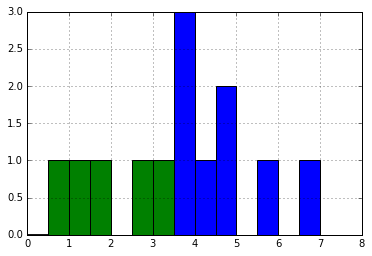

In [21]:
filtered_qualities.hist(bins=[i/2 for i in range(17)])
leftover_qualities.hist(bins=[i/2 for i in range(8)])